In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

data and DecisionTreeClassifier import

In [87]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
n=0
X = iris.data[:, n:] # petal length and width
#X = iris.data # all features
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [88]:
# tree_clf = DecisionTreeClassifier(max_depth=3, random_state = 0)
# tree_clf.fit(X_train, y_train)
# tree_clf.score(X_test, y_test)

In [90]:
# for depth in range(1, 10):
#     tree_clf = DecisionTreeClassifier(max_depth=depth, random_state = 0)
#     tree_clf.fit(X_train, y_train)
#     print(depth, tree_clf.score(X_train, y_train))
    
# for depth in range(1, 10):
#     tree_clf = DecisionTreeClassifier(max_depth=depth, random_state = 0)
#     tree_clf.fit(X_train, y_train)    
#     print(depth, tree_clf.score(X_test, y_test))

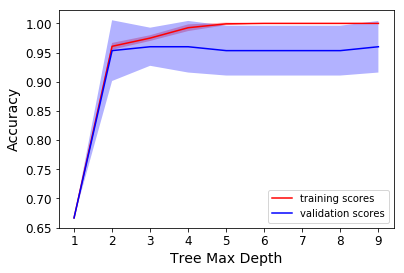

In [91]:
from sklearn.learning_curve import validation_curve
depths = np.arange(1, 10)
val_train, val_test = validation_curve(DecisionTreeClassifier(), X, y,
                                       'max_depth', depths, cv=10)
def plot_with_depth(depths, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(depths, mu, '-', **kwargs)
    plt.fill_between(depths, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)

plot_with_depth(depths, val_train, label='training scores', color = 'r')
plot_with_depth(depths, val_test, label='validation scores', color = 'b')
plt.xlabel('Tree Max Depth'); plt.ylabel('Accuracy')
plt.legend();

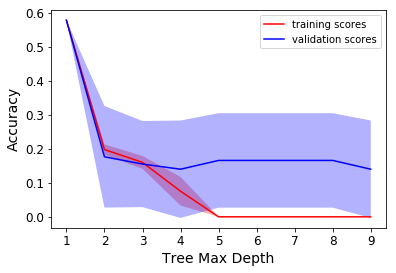

In [92]:
def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

degree = np.arange(0, 18)
val_train, val_test = validation_curve(DecisionTreeClassifier(), X, y,
                                       'max_depth', depths, cv=10,
                                       scoring=rms_error)

plot_with_depth(depths, val_train, label='training scores', color = 'r')
plot_with_depth(depths, val_test, label='validation scores', color = 'b')
plt.xlabel('Tree Max Depth'); plt.ylabel('Accuracy')
plt.legend();

In [ ]:
# from sklearn.learning_curve import learning_curve

# def plot_learning_curve(degree=3):
#     train_sizes = np.linspace(0.05, 1, 20)
#     N_train, val_train, val_test = learning_curve(PolynomialRegression(degree),
#                                                   X, y, train_sizes, cv=5,
#                                                   scoring=rms_error)
#     plot_with_err(N_train, val_train, label='training scores')
#     plot_with_err(N_train, val_test, label='validation scores')
#     plt.xlabel('Training Set Size'); plt.ylabel('rms error')
#     plt.ylim(0, 3)
#     plt.xlim(5, 80)
#     plt.legend()

In [45]:
print (list(range(1, 10)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [93]:
from sklearn.svm import SVC # "Support vector classifier"
svm_clf = SVC(kernel='linear', C=1E10)
svm_clf.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
# svm_clf = SVC(kernel='linear', C=1E10)
svm_clf = SVC(kernel='rbf')

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.97777777777777775

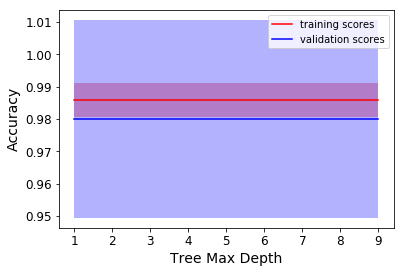

In [97]:
degrees = np.arange(1, 10)
val_train, val_test = validation_curve(SVC(), X, y,
                                       'degree', degrees, cv=10)

plot_with_depth(depths, val_train, label='training scores', color = 'r')
plot_with_depth(depths, val_test, label='validation scores', color = 'b')
plt.xlabel('Tree Max Depth'); plt.ylabel('Accuracy')
plt.legend();

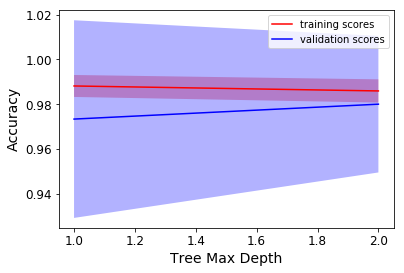

In [102]:
kernels = ['linear', 'rbf']
val_train, val_test = validation_curve(SVC(), X, y,
                                       'kernel', kernels, cv=10)

plot_with_depth([1, 2], val_train, label='training scores', color = 'r')
plot_with_depth([1, 2], val_test, label='validation scores', color = 'b')
plt.xlabel('Tree Max Depth'); plt.ylabel('Accuracy')
plt.legend();

In [101]:
val_train

array([[ 0.98518519,  0.97777778,  0.98518519,  0.98518519,  0.99259259,
         0.99259259,  0.99259259,  0.99259259,  0.99259259,  0.98518519],
       [ 0.98518519,  0.98518519,  0.98518519,  0.98518519,  0.98518519,
         0.99259259,  0.99259259,  0.97777778,  0.99259259,  0.97777778]])

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.97777777777777775